# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mesa/time.py:80: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


  0%|          | 0/25 [00:00<?, ?it/s]

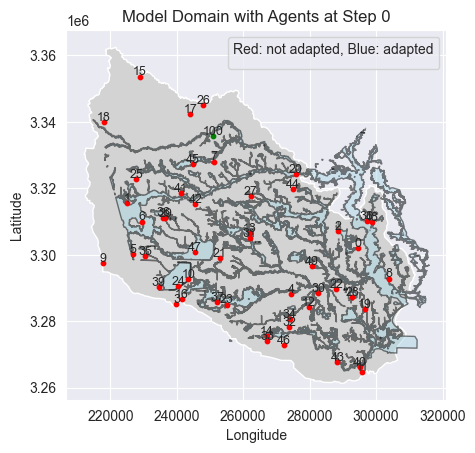

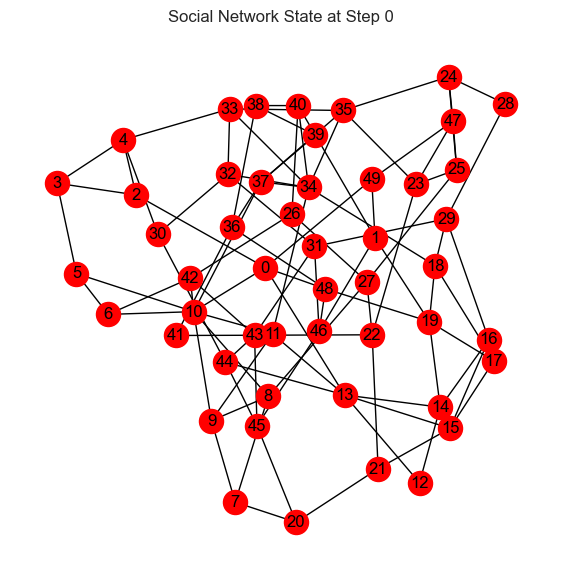

<Figure size 1000x600 with 0 Axes>

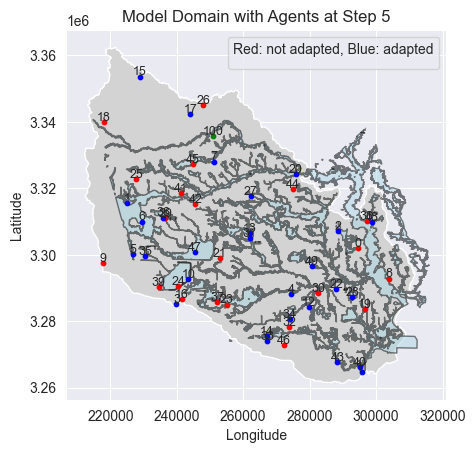

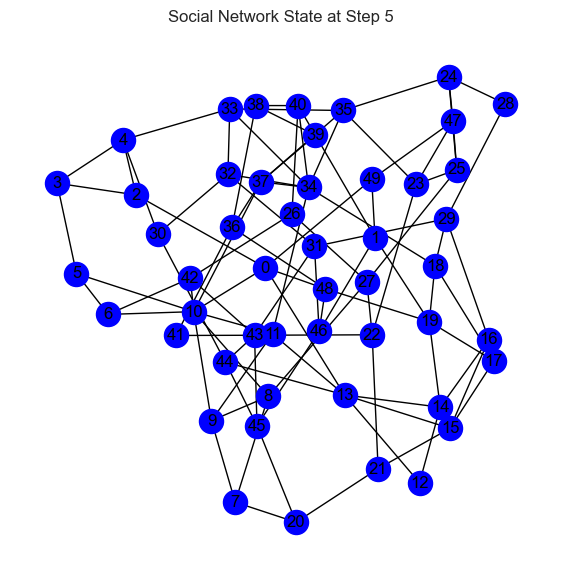

<Figure size 1000x600 with 0 Axes>

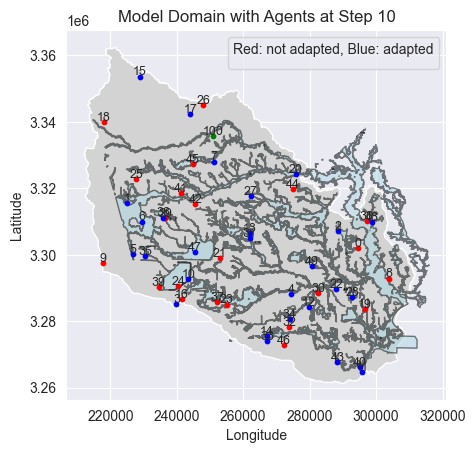

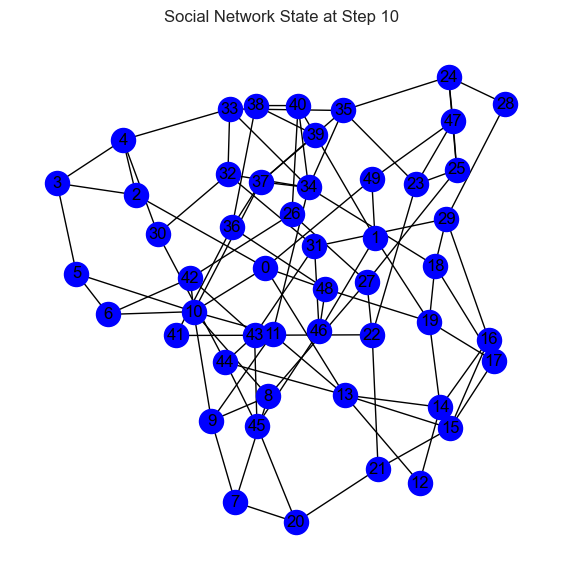

<Figure size 1000x600 with 0 Axes>

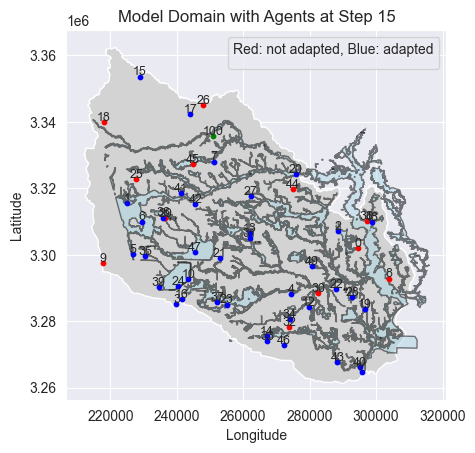

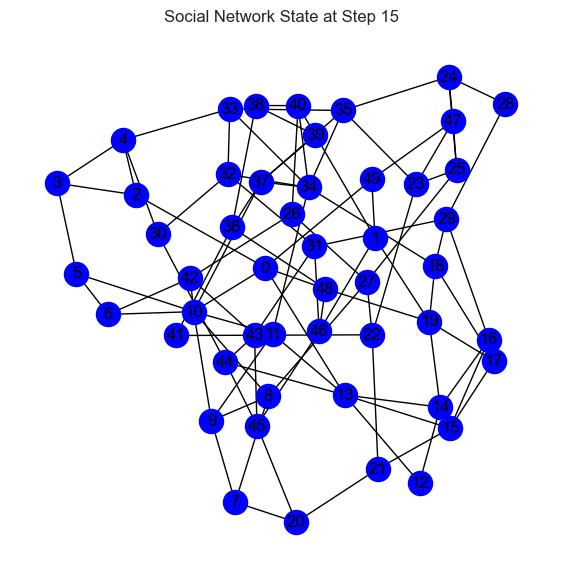

<Figure size 1000x600 with 0 Axes>

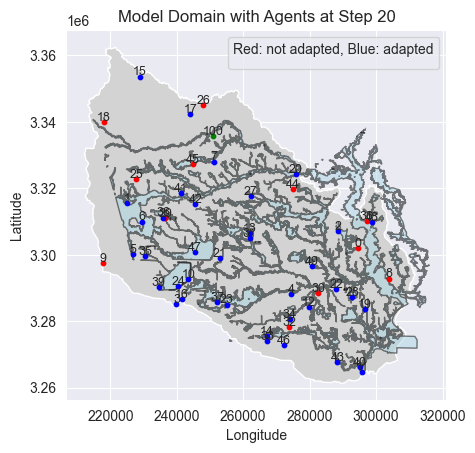

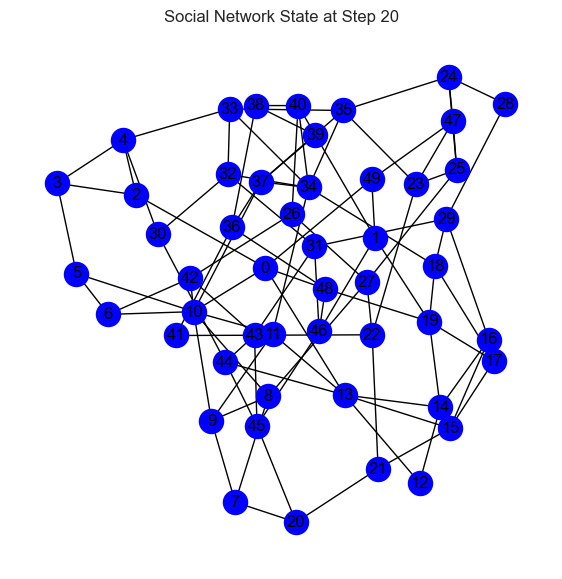

In [1]:
from model import AdaptationModel
from agents import Government, Households
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from mesa.batchrunner import batch_run
import pandas as pd

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey",network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

params = {
    "flood_warning": [0.1, 0.15, 0.2, 0.25, 0.3]}

batch_run = batch_run(
        AdaptationModel,  
        parameters=params,
        iterations=5,  
        max_steps=20,  
        number_processes=1,
        data_collection_period=1,
        display_progress=True,
    )


# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    for agent in model.schedule.agents:
        if isinstance(agent, Households):
            colors = 'blue' if agent.desire_to_take_measures else 'red' 
        #elif isinstance(agent, Government):
            #colors = 'green'
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data


PerceivedEffectiveness  PerceivedFloodProbability  \
Step AgentID                                                      
0    0                           NaN                   0.073814   
     1                           NaN                   0.799874   
     2                           NaN                   0.302956   
     3                           NaN                   0.908338   
     4                           NaN                   0.788702   
...                              ...                        ...   
19   46                     2.029788                   0.610399   
     47                     4.039192                   0.544332   
     48                     3.678797                   0.599939   
     49                     3.078574                   0.616745   
     100                         NaN                        NaN   

              FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.220861              0.384616          0.000000   
     1                   0.832493              0.616290          0.000000   
     2                   1.324579              0.697379          0.000000   
     3                   0.999325              0.648182          0.000000   
     4                   1.828975              0.753716          0.000000   
...                           ...                   ...               ...   
19   46                  0.342539              0.461239          0.292505   
     47                  5.332993              0.940565          3.245543   
     48                  3.098215              0.845742          1.696749   
     49                  1.361618              0.702194          0.950468   
     100                      NaN                   NaN               NaN   

              FloodDamageActual DesireToTakeMeasures IsAdapted  FriendsCount  \
Step AgentID                                                                   
0    0                 0.000000                False     False           5.0   
     1                 0.000000                False     False           4.0   
     2                 0.000000                False     False           3.0   
     3                 0.000000                False     False           3.0   
     4                 0.000000                False     False           4.0   
...                         ...                  ...       ...           ...   
19   46                0.433669                 True      True           4.0   
     47                0.853854                 True      True           4.0   
     48                0.740613                 True      True           4.0   
     49                0.639430                 True      True           3.0   
     100                    NaN                 None      None           NaN   

                                                   location  MoneySaved  \
Step AgentID                                                              
0    0        POINT (294629.01418182126 3302051.8515697303)    37533.60   
     1         POINT (225046.74612921715 3315671.770493219)    36201.60   
     2         POINT (288637.6782908415 3307093.5322367735)    32839.20   
     3          POINT (239902.44769427553 3285214.46868209)    28227.60   
     4          POINT (274486.1453035327 3288298.901476701)    39045.60   
...                                                     ...         ...   
19   46         POINT (272240.2058058848 3272787.729670659)    49201.25   
     47        POINT (245527.26492789498 3300948.837310871)    53009.00   
     48         POINT (298675.7929165082 3309791.202245515)    38357.00   
     49         POINT (280560.4121163099 3296722.858661091)    21067.50   
     100      POINT (250931.53019638758 3335627.6027623895)         NaN   

              FinedTotal  
Step AgentID              
0    0               NaN  
     1               NaN  
     2         

In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households,total_flood_damage,whatif_damage
0,0,0.000000,0.000000e+00
1,22,0.000000,0.000000e+00
2,25,0.000000,0.000000e+00
3,26,0.000000,0.000000e+00
4,27,0.000000,0.000000e+00
5,28,961008.819199,5.075505e+06
6,28,961008.819199,5.075505e+06
7,28,961008.819199,5.075505e+06
8,28,961008.819199,5.075505e+06
9,28,961008.819199,5.075505e+06


In [4]:
batch_data = pd.DataFrame(batch_run)
batch_data

,RunId,iteration,Step,flood_warning,total_adapted_households,total_flood_damage,whatif_damage,AgentID,PerceivedEffectiveness,PerceivedFloodProbability,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,DesireToTakeMeasures,IsAdapted,FriendsCount,location,MoneySaved,FinedTotal
0,0,0,0,0.1,0,0.000000,0.000000e+00,0,NaN,0.906101,0.194775,0.362670,0.000000,0.000000,False,False,3.0,POINT (218199.66995935442 3303910.807614218),31939.2,NaN
1,0,0,0,0.1,0,0.000000,0.000000e+00,1,NaN,0.525746,0.701569,0.586415,0.000000,0.000000,False,False,4.0,POINT (306308.17076676234 3299059.0802518134),39506.4,NaN
2,0,0,0,0.1,0,0.000000,0.000000e+00,2,NaN,0.015760,1.517475,0.721117,0.000000,0.000000,False,False,5.0,POINT (230536.2383653243 3291906.457318307),31536.0,NaN
3,0,0,0,0.1,0,0.000000,0.000000e+00,3,NaN,0.576932,0.892792,0.628500,0.000000,0.000000,False,False,4.0,POINT (264543.11045841675 3297970.163058772),26530.2,NaN
4,0,0,0,0.1,0,0.000000,0.000000e+00,4,NaN,0.006994,0.276070,0.423572,0.000000,0.000000,False,False,4.0,POINT (235219.2170788219 3328047.4258792805),35587.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13645,24,4,20,0.3,10,587258.868446,1.948047e+06,21,2.188869,0.689478,0.414473,0.494521,0.351821,0.465907,False,True,4.0,POINT (286275.3503172371 3303892.3735319027),36912.4,NaN
13646,24,4,20,0.3,10,587258.868446,1.948047e+06,22,0.120569,0.687511,0.000000,0.000000,0.000000,0.000000,False,False,5.0,POINT (297154.3066576663 3284682.6726738457),59427.2,NaN
13647,24,4,20,0.3,10,587258.868446,1.948047e+06,23,0.090744,0.686475,0.000000,0.000000,0.000000,0.000000,False,False,7.0,POINT (225169.81216380425 3328499.0675017303),45931.2,NaN
13648,24,4,20,0.3,10,587258.868446,1.948047e+06,24,1.717875,0.691396,0.216251,0.380933,0.146869,0.313380,False,False,4.0,POINT (217018.93216482078 3309519.3815221284),52076.4,NaN


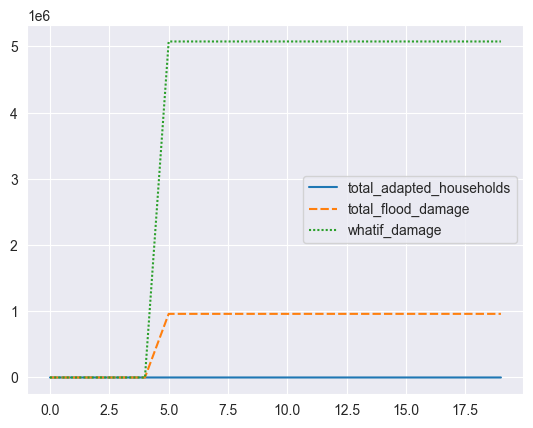

In [5]:
model_data = model.datacollector.get_model_vars_dataframe()
g = sns.lineplot(data=model_data)

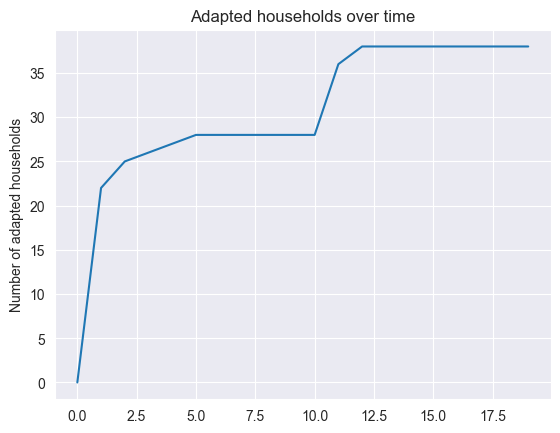

In [6]:
model_data = model.datacollector.get_model_vars_dataframe()
adapted_households = model_data['total_adapted_households'].values
g = sns.lineplot(data=adapted_households)
g.set(title="Adapted households over time", ylabel="Number of adapted households");

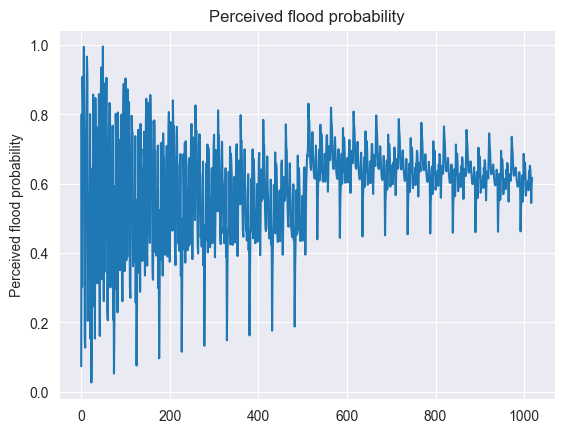

In [7]:
agent_data = model.datacollector.get_agent_vars_dataframe()
perceived_flood_probability = agent_data['PerceivedFloodProbability'].values
g = sns.lineplot(data=perceived_flood_probability)
g.set(title="Perceived flood probability", ylabel="Perceived flood probability");

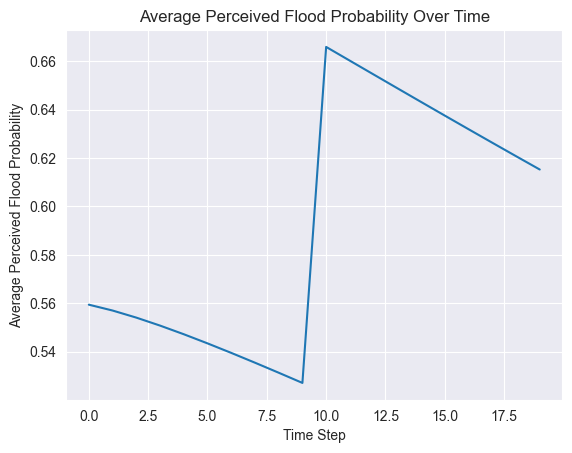

In [8]:
plt.plot(model.average_perceived_flood_probability_over_time)
plt.xlabel('Time Step')
plt.ylabel('Average Perceived Flood Probability')
plt.title('Average Perceived Flood Probability Over Time')
plt.show()

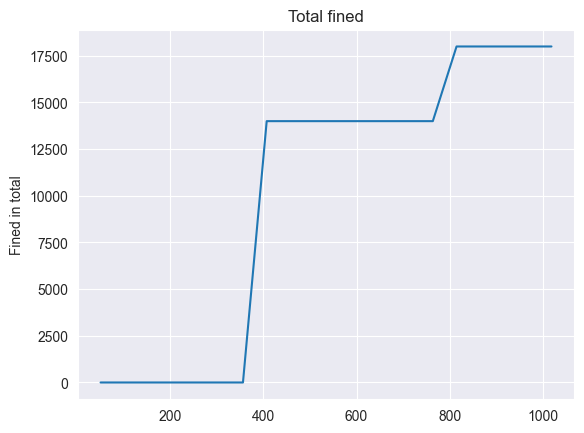

In [9]:
agent_data = model.datacollector.get_agent_vars_dataframe()
perceived_flood_probability = agent_data['FinedTotal'].values
g = sns.lineplot(data=perceived_flood_probability)
g.set(title="Total fined", ylabel="Fined in total");

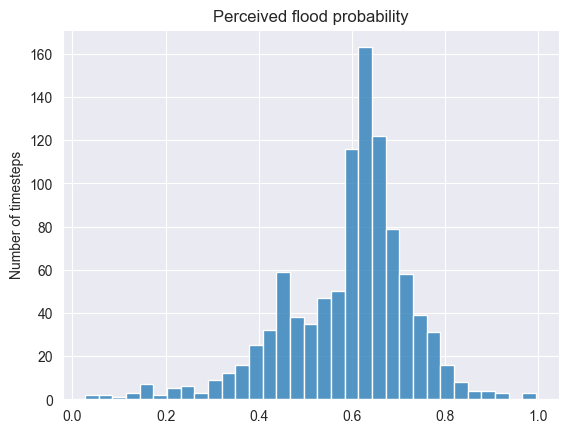

In [10]:
agent_data = model.datacollector.get_agent_vars_dataframe()
perceived_flood_probability = agent_data['PerceivedFloodProbability'].values
g = sns.histplot(perceived_flood_probability, discrete= False)
g.set(title="Perceived flood probability", ylabel="Number of timesteps");